In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

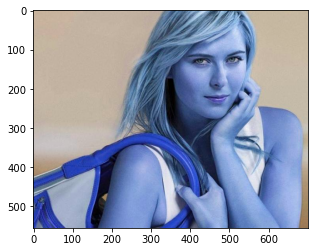

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

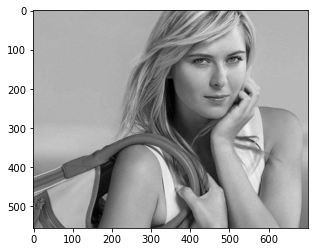

In [6]:
plt.imshow(gray,cmap='gray')

In [23]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [11]:
(x,y,w,h) = faces[0]
faces[0]

array([352,  38, 233, 233])

In [18]:
face_image = cv2.rectangle(img,(x,y),((x+w),(y+h)),(299,0,0),2)

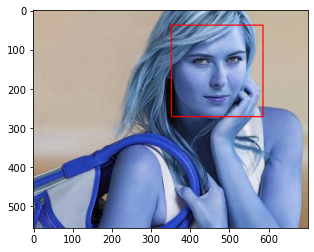

In [19]:
plt.imshow(face_image)

In [24]:

for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
    faceROI = frame_gray[y:y+h,x:x+w]
    #-- In each face, detect eyes
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2 + h2)*0.25))
        frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
cv.imshow('Capture - Face detection', frame)

NameError: name 'frame' is not defined